### <center> Classification with KNN and SVM

## Firstly, I load the data and convert it to matrix. And I select values and conduct the min-max normalization.

In [1]:
import pandas as pd
import numpy as np

df=pd.read_csv('bank-full.csv', sep=';',header=0)
bank_matrix = df.as_matrix()
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
5,35,management,married,tertiary,no,231,yes,no,unknown,5,may,139,1,-1,0,unknown,no
6,28,management,single,tertiary,no,447,yes,yes,unknown,5,may,217,1,-1,0,unknown,no
7,42,entrepreneur,divorced,tertiary,yes,2,yes,no,unknown,5,may,380,1,-1,0,unknown,no
8,58,retired,married,primary,no,121,yes,no,unknown,5,may,50,1,-1,0,unknown,no
9,43,technician,single,secondary,no,593,yes,no,unknown,5,may,55,1,-1,0,unknown,no


In [2]:
df.drop(df.columns[[1, 2, 4, 6, 7, 8, 15]], axis=1, inplace = True)
edu_dict={'unknown':0, 'primary':1, 'secondary':2, 'tertiary':3}
df['education']= df['education'].map(edu_dict).astype(float)
df.head(20)

,age,education,balance,day,month,duration,campaign,pdays,previous,y
0,58,3.0,2143,5,may,261,1,-1,0,no
1,44,2.0,29,5,may,151,1,-1,0,no
2,33,2.0,2,5,may,76,1,-1,0,no
3,47,0.0,1506,5,may,92,1,-1,0,no
4,33,0.0,1,5,may,198,1,-1,0,no
5,35,3.0,231,5,may,139,1,-1,0,no
6,28,3.0,447,5,may,217,1,-1,0,no
7,42,3.0,2,5,may,380,1,-1,0,no
8,58,1.0,121,5,may,50,1,-1,0,no
9,43,2.0,593,5,may,55,1,-1,0,no


In [3]:
from sklearn import preprocessing

le = preprocessing.LabelEncoder()
for i in range(0, len(df.columns)):
    if df.iloc[:,i].dtype == 'object':
        df.iloc[:,i] = le.fit_transform(df.iloc[:,i])
minmax_scale = preprocessing.MinMaxScaler().fit(df)
df_minmax = minmax_scale.transform(df)
df = pd.DataFrame(df_minmax)

df_data = df.iloc[:,:9]
df_target = df.iloc[:,9]
print(df_data.head(10))


          0         1         2         3         4         5    6    7    8
0  0.519481  1.000000  0.092259  0.133333  0.727273  0.053070  0.0  0.0  0.0
1  0.337662  0.666667  0.073067  0.133333  0.727273  0.030704  0.0  0.0  0.0
2  0.194805  0.666667  0.072822  0.133333  0.727273  0.015453  0.0  0.0  0.0
3  0.376623  0.000000  0.086476  0.133333  0.727273  0.018707  0.0  0.0  0.0
4  0.194805  0.000000  0.072812  0.133333  0.727273  0.040260  0.0  0.0  0.0
5  0.220779  1.000000  0.074901  0.133333  0.727273  0.028264  0.0  0.0  0.0
6  0.129870  1.000000  0.076862  0.133333  0.727273  0.044124  0.0  0.0  0.0
7  0.311688  1.000000  0.072822  0.133333  0.727273  0.077267  0.0  0.0  0.0
8  0.519481  0.333333  0.073902  0.133333  0.727273  0.010167  0.0  0.0  0.0
9  0.324675  0.666667  0.078187  0.133333  0.727273  0.011183  0.0  0.0  0.0


### Then I divide the dataset into 2/3 for training and 1/3 for test. Since it is common to split 60%-80% of data for training and remaining for test

In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(
    df_data, df_target, test_size=0.33, random_state=42)



### Here  I adopt KNN and SVM for classification.

In [5]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=5)
neigh.fit(X_train, Y_train) 
knn_predict = neigh.predict(X_test)
# knn_predict

In [6]:
from sklearn import svm

clf = svm.LinearSVC()
clf.fit(X_train, Y_train)
svm_predict = clf.predict(X_test)


In [7]:
# from sklearn.model_selection import cross_val_score
# print(cross_val_score(clf, X_test, Y_test)) 
# print(cross_val_score(neigh, X_test, Y_test))

### Shown as the following plots,  for the target value--'y', KNN classifier can better distinguish each class than SVM. 
### For the pair of features 'duration' and 'campaign', clients who had the very large number of contacts during this campaign, subscribe the term deposit. And those had a longer duration of last contact, are apt for term deposit subscription.
### For the pair of features 'balance' and 'age',  people who subscribe a term deposit  don't have much balance, while people with more balance in their account  don't subscribe a term deposit.
### For the pair of features 'pdays' and 'campaign', clients who had the very large number of contacts during this campaign, subscribe the term deposit. While those who have greater number of days that passed by after the last contact tend to say 'no' for term deposit apparently.

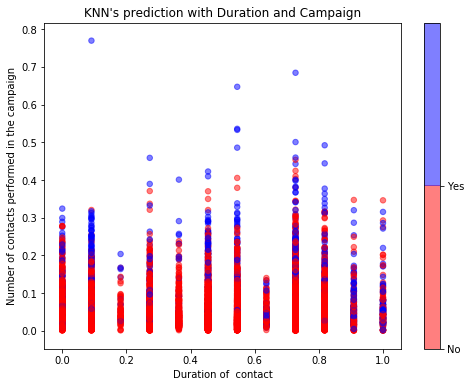

In [14]:
import matplotlib.pyplot as plt
import matplotlib
import numpy as np

colors = ['red','blue']
yorn = ['No', 'Yes']

plt.figure(figsize=(8,6))
plt.scatter(X_test.iloc[:,-5],X_test.iloc[:,-4], c=knn_predict, s = 30, alpha = 0.5 
            , cmap=matplotlib.colors.ListedColormap(colors))

cb = plt.colorbar()
loc = np.arange(0,1,1/2)
cb.set_ticks(loc)
cb.set_ticklabels(yorn)

plt.xlabel('Duration of  contact')
plt.ylabel('Number of contacts performed in the campaign')
plt.title("KNN's prediction with Duration and Campaign")
plt.show() 

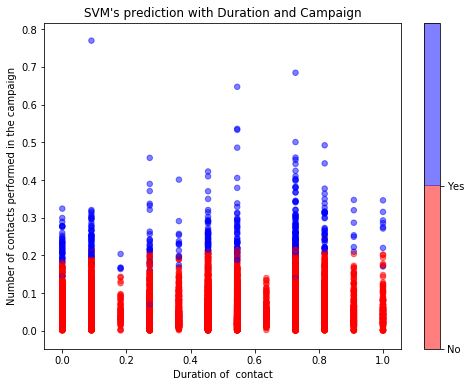

In [9]:
import matplotlib.pyplot as plt
import matplotlib
import numpy as np

colors = ['red','blue']
yorn = ['No', 'Yes']

plt.figure(figsize=(8,6))
plt.scatter(X_test.iloc[:,-5],X_test.iloc[:,-4], c=svm_predict, s = 30, alpha = 0.5 
            , cmap=matplotlib.colors.ListedColormap(colors))

cb = plt.colorbar()
loc = np.arange(0,1,1/2)
cb.set_ticks(loc)
cb.set_ticklabels(yorn)

plt.xlabel('Duration of  contact')
plt.ylabel('Number of contacts performed in the campaign')
plt.title("SVM's prediction with Duration and Campaign")
plt.show() 

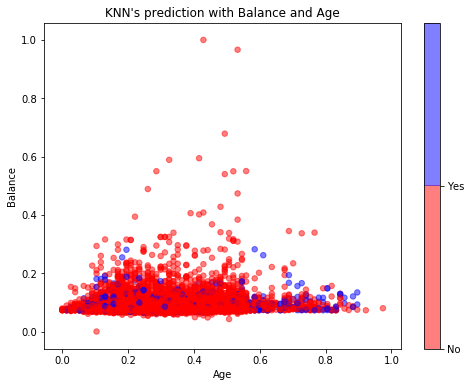

In [10]:

colors = ['red','blue']
y_n = ['No', 'Yes']

plt.figure(figsize=(8,6))
plt.scatter(X_test.iloc[:,0],X_test.iloc[:,2], c=knn_predict, s = 30, alpha = 0.5 
            , cmap=matplotlib.colors.ListedColormap(colors))

cb = plt.colorbar()
loc = np.arange(0,1,1/2)
cb.set_ticks(loc)
cb.set_ticklabels(y_n)

plt.xlabel('Age')
plt.ylabel('Balance')
plt.title("KNN's prediction with Balance and Age")
plt.show()

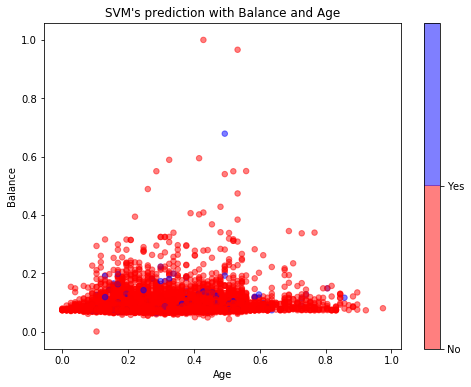

In [11]:
colors = ['red','blue']
y_n = ['No', 'Yes']

plt.figure(figsize=(8,6))
plt.scatter(X_test.iloc[:,0],X_test.iloc[:,2], c=svm_predict, s = 30, alpha = 0.5 
            , cmap=matplotlib.colors.ListedColormap(colors))

cb = plt.colorbar()
loc = np.arange(0,1,1/2)
cb.set_ticks(loc)
cb.set_ticklabels(y_n)

plt.xlabel('Age')
plt.ylabel('Balance')

plt.title("SVM's prediction with Balance and Age")
plt.show()

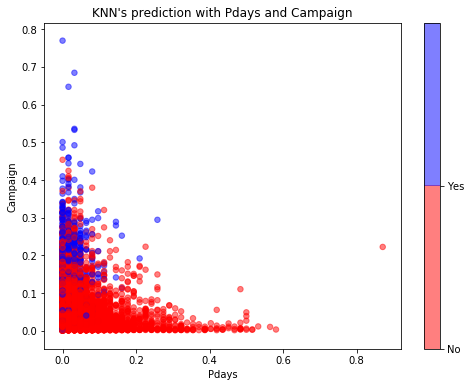

In [12]:
colors = ['red','blue']
y_n = ['No', 'Yes']

plt.figure(figsize=(8,6))
plt.scatter(X_test.iloc[:,-3],X_test.iloc[:,-4], c=knn_predict, s = 30, alpha = 0.5 
            , cmap=matplotlib.colors.ListedColormap(colors))

cb = plt.colorbar()
loc = np.arange(0,1,1/2)
cb.set_ticks(loc)
cb.set_ticklabels(y_n)

plt.xlabel('Pdays')
plt.ylabel('Campaign')

plt.title("KNN's prediction with Pdays and Campaign")
plt.show()

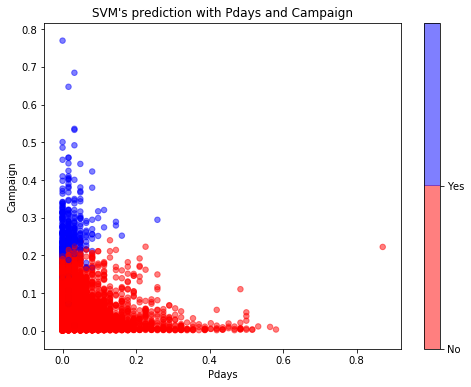

In [13]:
colors = ['red','blue']
y_n = ['No', 'Yes']

plt.figure(figsize=(8,6))
plt.scatter(X_test.iloc[:,-3],X_test.iloc[:,-4], c=svm_predict, s = 30, alpha = 0.5 
            , cmap=matplotlib.colors.ListedColormap(colors))

cb = plt.colorbar()
loc = np.arange(0,1,1/2)
cb.set_ticks(loc)
cb.set_ticklabels(y_n)

plt.xlabel('Pdays')
plt.ylabel('Campaign')

plt.title("SVM's prediction with Pdays and Campaign")
plt.show()